<a href="https://colab.research.google.com/github/knagaev/HackerRank/blob/main/Nagaev_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи на методы одномерной минимизации и методы нулевого порядка

## Задача 1 (3 pts)

В конспекте можно найти псевдокод для метода золотого сечения, а также метод Фибоначчи описан в статье [тут](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8#:~:text=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8%5B%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D1%82%D1%8C%5D,%D0%BA%D0%B0%D0%B6%D0%B4%D0%BE%D0%B9%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D1%8E%D1%89%D0%B5%D0%B9%20%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%20%D0%BF%D0%BE%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D1%83.).
Ваша задача реализовать эти два метода и протестировать их сходимость по времени и по итерациям для функции

$$ f(x) = -\frac{1}{(x-1)^2} \left( \log x - 2 \frac{x-1}{x+1} \right) $$

на отрезке $[1.2, 5]$.

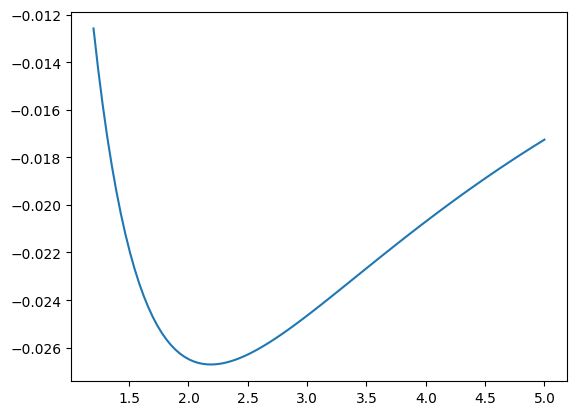

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
  return -1./(x-1)**2 * (np.log(x) - 2 * (x - 1) / (x+1))

x = np.linspace(1.2, 5, num=100)
y = func(x)
plt.plot(x, y)

In [7]:

import time

def golden_ratio_method(func, a, b, eps=1e-6, lim_iter=1000):
    phi = (np.sqrt(5) + 1.) / 2.
    i = 0

    while np.abs(b - a) > eps and i < lim_iter:

        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi

        y1 = func(x1)
        y2 = func(x2)

        if y1 >= y2:
            a = x1
        else:
            b = x2

        i += 1

    x = (a + b) / 2
    return (x, func(x), i)

def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)

def fibonacci_method(func, a, b, eps=1e-6):
    n = 0
    while fib(n) < (b-a) / eps:
        n += 1

    x1 = a + (fib(n-2) / fib(n)) * (b-a)
    x2 = a + (fib(n-1) / fib(n)) * (b-a)

    f1 = func(x1)
    f2 = func(x2)

    for i in range(2, n):
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (fib(n-i) / fib(n-i+2)) * (b-a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (fib(n-i+1) / fib(n-i+2)) * (b-a)
            f2 = func(x2)

    x = (a + b) / 2
    return (x, func(x), n)

a, b = 1.2, 5.0

start_time = time.time()
x_gr, f_gr, i = golden_ratio_method(func, a, b)
time_gr = time.time() - start_time

print("Метод золотого сечения:")
print(f"x = {x_gr}, f(x) = {f_gr}, {i} итераций за {time_gr}")

start_time = time.time()
x_fib, f_fib, i = fibonacci_method(func, a, b)
time_fib = time.time() - start_time

print("Метод Фибоначчи:")
print(f"x = {x_fib}, f(x) = {f_fib}, {i} итераций за {time_fib}")

Метод золотого сечения:
x = 2.1887047217473206, f(x) = -0.02670719022307065, 32 итераций за 0.0003647804260253906
Метод Фибоначчи:
x = 2.1887046550704516, f(x) = -0.0267071902230706, 34 итераций за 12.167223930358887


## Задача 2 (5 pts)

Для функций, область определения которых является подмножеством пространства размерности больше 1, применение таких простых методов становится затруднительным, так как означает экспоненциальную сложность по размерности задачи.
Поэтому для решения таких задач были предложены другие методы нулевого порядка, то есть безградиентные.

Для простоты сравните метод Нелдера-Мида из пакета [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html) и стандартный метод из библиотеки [zoopt](https://zoopt.readthedocs.io/en/latest/index.html) по времени работы и по итерациям необходимым до сходимости к заданной точности.

Тестовая задача:

$$ \min_{x \in \mathbb{R}^n} 5 n + \sum_{i=1}^n [x_i^2 - 5\cos 2\pi x_i]$$

- $n=2$
- $n=5$
- $n=20$

In [ ]:
from scipy.optimize import minimize
from zoopt import Dimension, Objective, Parameter, Opt

def func(x):
    n = len(x)
    return 5 * n + sum([xi**2 - 5 * np.cos(2 * np.pi * xi) for xi in x])

# Для zoopt исправление формата - массив из солвера
def zoopt_func(solution):
    x = solution.get_x()
    return func(x)

dimensions = [2, 5, 20]
results = {}

for n in dimensions:
    print(f"\nРазмерность: {n}")

    # Нелдер-Мид
    x0 = np.ones(n)
    start_time = time.time()
    result_nm = minimize(func, x0, method='Nelder-Mead', options={'disp': False, 'maxiter': 10000})
    time_nm = time.time() - start_time

    # zoopt
    zoopt_success = False
    zoopt_value = float('inf')
    zoopt_time = 0

    dim = Dimension(n, [[-10, 10]] * n, [False] * n)
    objective = Objective(zoopt_func, dim)
    start_time = time.time()
    parameter = Parameter(budget=5000, intermediate_result=False)
    solution = Opt.min(objective, parameter)
    zoopt_time = time.time() - start_time
    zoopt_value = solution.get_value()

    print(f"Нелдер-Мид: f(x) = {result_nm.fun:.6f}, время: {time_nm:.4f} сек, итераций: {result_nm.nit}")
    print(f"zoopt: f(x) = {zoopt_value:.6f}, время: {zoopt_time:.4f} сек, итераций: 5000")



Размерность: 2
[zoopt] x: [0, 0]
[zoopt] value: 0.0
Нелдер-Мид: f(x) = 1.979933, время: 0.0022 сек, итераций: 23
zoopt: f(x) = 0.000000, время: 0.2215 сек, итераций: 5000

Размерность: 5
[zoopt] x: [0, 0, 0, 0, 0]
[zoopt] value: 0.0
Нелдер-Мид: f(x) = 4.949831, время: 0.0032 сек, итераций: 70
zoopt: f(x) = 0.000000, время: 0.2527 сек, итераций: 5000

Размерность: 20
[zoopt] x: [0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[zoopt] value: 2.0
Нелдер-Мид: f(x) = 19.799326, время: 0.0138 сек, итераций: 426
zoopt: f(x) = 2.000000, время: 0.3953 сек, итераций: 5000
